# 1.
## (a)

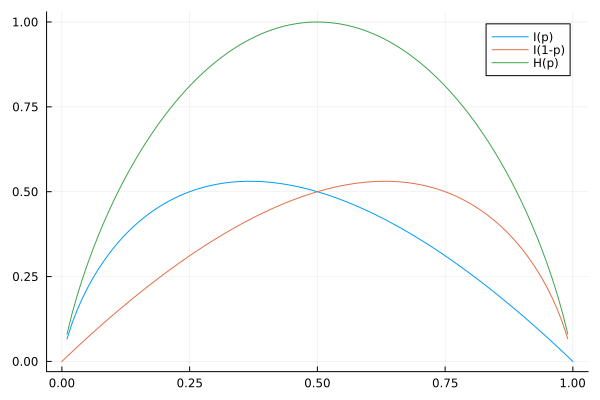

In [1]:
using Plots
gr()

p = 0:0.01:1

I(p) = -p * log2(p)
H(p) = I(p) + I(1 - p)

plot(p, [I.(p), I.(1 .- p), H.(p)], label=["I(p)" "I(1-p)" "H(p)"])

## (b)

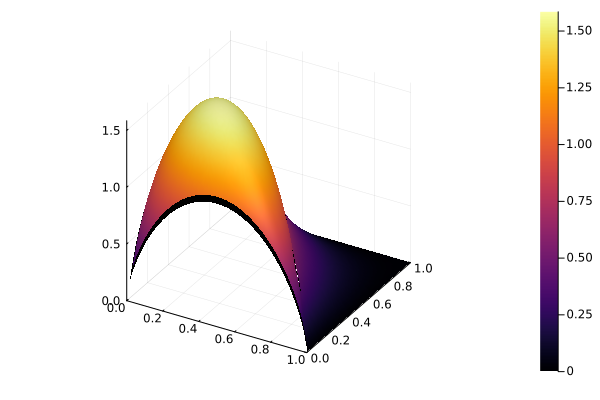

In [2]:
p = 0:0.01:1
I(p) = -p * log2(abs(p))
H(p1, p2) = I(p1) + I(p2) + I(1 - p1 - p2)

surface(p, p, H)

# 2.
The derivative image has a lower entropy than the original image, because most of its pixel values are close to zero and have a high probability. This means that the derivative image contains less information per pixel than the original image, and therefore it can be compressed more efficiently.

# 3.
## (a)

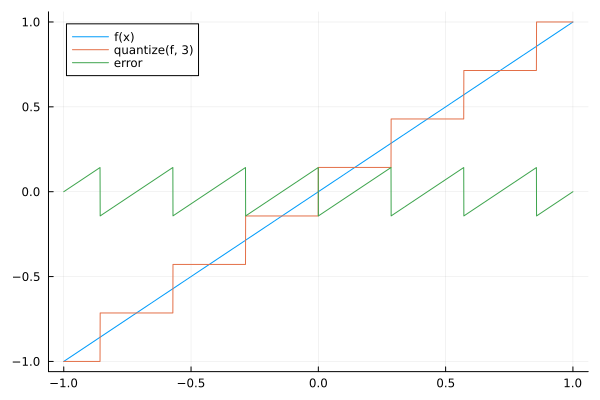

In [3]:
using Optim

function quantize(f::Function, bits::Int, first::Real, last::Real)
    min = optimize(f, first, last).minimum
    max = -optimize(x -> -f(x), first, last).minimum
    step = (max - min) / (2^bits - 1)
    # return quantize function and error function
    return [x -> min + step * round((f(x) - min) / step), x -> f(x) - min - step * round((f(x) - min) / step)]
end

bit = 3

f(x) = x
p1 = plot(f, -1, 1, label="f(x)")
plot!(quantize(f, bit, -1, 1), -1, 1, label=["quantize(f, $bit)" "error"], legend=:topleft)

## (b)

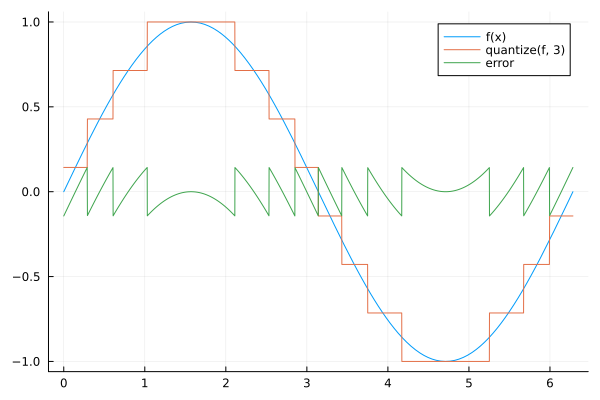

In [4]:
f(x) = sin(x)
p2 = plot(f, 0, 2π, label="f(x)")
plot!(quantize(f, 3, 0, 2π), 0, 2π, label=["quantize(f, $bit)" "error"])